### 运行说明：
### 该笔记需要python环境，环境中需确保有sklearn  matplotlib  pandas  numpy库

==============================================================================================================================================================

### 利用随机森林对加州房价数据进行回归训练，预测其中位数价格

数据集特征

MedInc: 区域内家庭的中位收入。

HouseAge: 房屋的中位年龄。

AveRooms: 每个家庭的平均房间数。

AveBedrms: 每个家庭的平均卧室数。

Population: 区域内总人口。

AveOccup: 平均家庭居住人数。

Latitude: 区域的纬度。

Longitude: 区域的经度。

所求目标是房屋的中位数价值。

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# 加载数据
california_data = fetch_california_housing()
data = pd.DataFrame(california_data["data"], columns=california_data.feature_names)
data["Target"] = california_data['target']

# 数据预处理
X = data.drop("Target", axis=1).values
y = data["Target"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 数据分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义决策树模型
model = DecisionTreeRegressor(random_state=50)

# 训练模型
model.fit(X_train, y_train)

# 预测
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# 计算RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

print(f'Final Train RMSE: {train_rmse:.4f}')
print(f'Final Val RMSE: {val_rmse:.4f}')

Final Train RMSE: 0.0000
Final Val RMSE: 0.7027


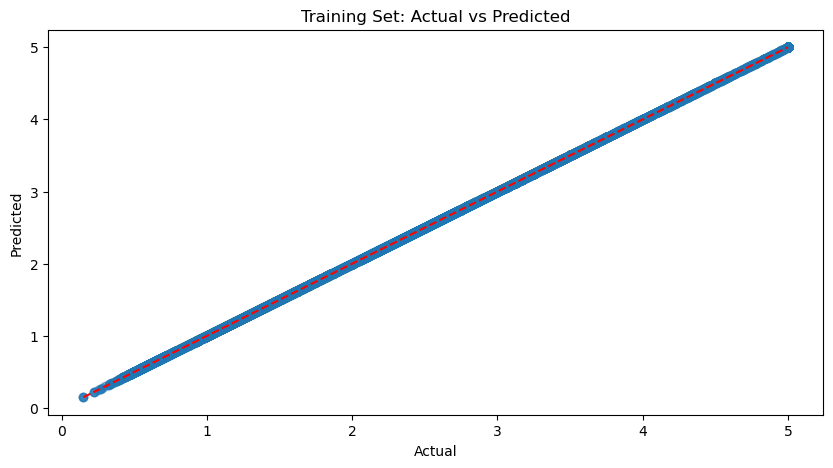

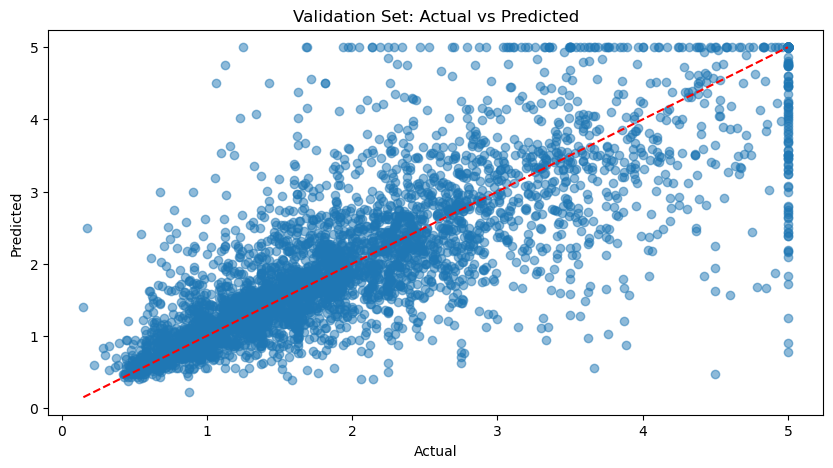

In [8]:
import matplotlib.pyplot as plt

# 绘制训练集预测值与真实值
plt.figure(figsize=(10, 5))
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.show()

# 绘制验证集预测值与真实值
plt.figure(figsize=(10, 5))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')
plt.show()